<a href="https://colab.research.google.com/github/ngp-2020/genes4epilepsy/blob/main/genes4epilepsy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install gseapy -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 597.6/597.6 kB 15.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import gseapy as gp
from gseapy.plot import gseaplot
import matplotlib.pyplot as plt
from gseapy import gseaplot2
from gseapy import enrichment_map

#gene_list="./data/genes_list.txt",
#gene_list=glist

# Cargar datos

gene_list = pd.read_csv('https://raw.githubusercontent.com/MDhewei/Bioinforbricklayer/refs/heads/main/BioinformaticsSkills/Skill06_GSEA/PRMT5_DMSO_differential.txt', delimiter='\t')
print(gene_list.head())

      Gene Category  PRMT5_biased  DMSO_biased     PRMT5      DMSO         Z  \
0    PPP4C    Other     -1.391712    -0.920506 -1.420999 -0.892814 -5.175958   
1    PRMT5    Other     -0.745324    -0.266945 -0.770068 -0.265418 -4.945346   
2  HDGFRP2    Other     -0.413583    -0.009660 -0.417287 -0.009358 -3.997596   
3   SMNDC1    Other     -1.115249    -0.787404 -1.160153 -0.766771 -3.855049   
4    PRMT1    Other     -0.348763     0.026136 -0.351032  0.028911 -3.723365   

           P(-)    FDR(-)      P(+)  FDR(+)  P(replicates)  FDR(replicates)  \
0  1.133724e-07  0.000127  1.000000     1.0       0.002847         0.793765   
1  3.800432e-07  0.000212  1.000000     1.0       0.007508         0.793765   
2  3.199448e-05  0.011923  0.999968     1.0       0.009832         0.793765   
3  5.785314e-05  0.016170  0.999942     1.0       0.040122         0.793765   
4  9.829234e-05  0.021978  0.999902     1.0       0.048504         0.793765   

   P(sgRNAs)  FDR(sgRNAs)  
0   0.000004    

# To rank the genes based on differential essential Z-score

In [ ]:
gene_list['Rank'] = gene_list.Z
gene_list.sort_values(by = 'Rank', inplace = True)

In [ ]:
gene_list

,Gene,Category,PRMT5_biased,DMSO_biased,PRMT5,DMSO,Z,P(-),FDR(-),P(+),FDR(+),P(replicates),FDR(replicates),P(sgRNAs),FDR(sgRNAs),Rank
0,PPP4C,Other,-1.391712,-0.920506,-1.420999,-0.892814,-5.175958,1.133724e-07,0.000127,1.000000,1.000000,0.002847,0.793765,0.000004,0.001238,-5.175958
1,PRMT5,Other,-0.745324,-0.266945,-0.770068,-0.265418,-4.945346,3.800432e-07,0.000212,1.000000,1.000000,0.007508,0.793765,0.000004,0.001238,-4.945346
2,HDGFRP2,Other,-0.413583,-0.009660,-0.417287,-0.009358,-3.997596,3.199448e-05,0.011923,0.999968,1.000000,0.009832,0.793765,0.000155,0.019252,-3.997596
3,SMNDC1,Other,-1.115249,-0.787404,-1.160153,-0.766771,-3.855049,5.785314e-05,0.016170,0.999942,1.000000,0.040122,0.793765,0.000004,0.001238,-3.855049
4,PRMT1,Other,-0.348763,0.026136,-0.351032,0.028911,-3.723365,9.829234e-05,0.021978,0.999902,1.000000,0.048504,0.793765,0.000677,0.058264,-3.723365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,UBE3D,Other,0.496689,0.161840,0.505475,0.161485,3.370299,9.996246e-01,0.999997,0.000375,0.072727,0.000330,0.368602,0.005663,0.237074,3.370299
1114,METTL3,Other,-0.184093,-0.559196,-0.194697,-0.546443,3.446301,9.997158e-01,0.999997,0.000284,0.072727,0.109208,0.851280,0.000536,0.050743,3.446301
1115,ATR,Other,-1.022823,-1.457374,-1.049647,-1.419438,3.623120,9.998545e-01,0.999997,0.000146,0.054236,0.032575,0.793765,0.000314,0.035149,3.623120
1116,METTL14,Other,0.135077,-0.312501,0.135817,-0.310146,4.369509,9.999938e-01,0.999997,0.000006,0.003481,0.020534,0.793765,0.000084,0.015677,4.369509


## Get the table as GSEA inputs

In [ ]:
gene_list_rank = gene_list.loc[:, ['Gene', 'Rank']]

In [ ]:
gene_list_rank

,Gene,Rank
0,PPP4C,-5.175958
1,PRMT5,-4.945346
2,HDGFRP2,-3.997596
3,SMNDC1,-3.855049
4,PRMT1,-3.723365
...,...,...
1113,UBE3D,3.370299
1114,METTL3,3.446301
1115,ATR,3.623120
1116,METTL14,4.369509


## Load all the possible gene sets in the library

In [ ]:
gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'COMPARTMENTS_Curated_2025',
 'COMPARTMENTS_Experimental_2025',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DGIdb_Drug_Targets_2024',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_CRISPR_GeneDependency_CellLines_2023',
 'DepMap_WG_CRISPR_Scre

## Get the GSEA results for GO_BP_2025 gene sets

In [ ]:
gsea_res = gp.prerank(rnk = gene_list_rank, gene_sets='GO_Biological_Process_2025', seed = 1024)

In [ ]:
gsea_res = gp.prerank(rnk = gene_list_rank, gene_sets='GO_Biological_Process_2021', seed = 1024)

The results of GSEA stores as a dictionary

In [ ]:
print(list(gsea_res.results.keys())[0])
print(list(gsea_res.results.values())[0])

positive regulation of apoptotic process (GO:0043065)
{'name': 'prerank', 'es': -0.18824427874463417, 'nes': -0.6515544890477876, 'pval': 0.944558521560575, 'fdr': 0.9815251322160473, 'fwerp': 1.0, 'tag %': '9/36', 'gene %': '21.29%', 'lead_genes': 'TRAF7;CASP8;BARD1;PRDM11;APC;STK17B;SIRT2;DAPK3;NEUROD1', 'matched_genes': 'CDK5;SAP18;TP63;ABL1;SUDS3;BRMS1;ING4;SQSTM1;ATM;FOXA1;ING3;CTNNB1;NF1;FOXL2;SIAH1;TP53;STK4;GADD45G;USP27X;ING5;PRMT2;GADD45B;SIRT1;STK17A;RPS27A;TRAF6;GADD45A;NEUROD1;DAPK3;SIRT2;STK17B;APC;PRDM11;BARD1;CASP8;TRAF7', 'hits': [13, 17, 74, 148, 155, 250, 255, 306, 348, 350, 353, 412, 427, 458, 467, 491, 511, 537, 576, 672, 682, 685, 689, 732, 740, 744, 816, 881, 915, 916, 942, 985, 989, 1000, 1061, 1069], 'RES': [-0.0009242144177449168, -0.0018484288354898336, -0.0027726432532347504, -0.0036968576709796672, -0.004621072088724584, -0.0055452865064695, -0.006469500924214416, -0.007393715341959333, -0.008317929759704249, -0.009242144177449165, -0.010166358595194082, -0

In [ ]:
gene_list_out = []

for term in gsea_res.results:
    p = gsea_res.results[term]['pval']
    fdr = gsea_res.results[term]['fdr']
    nes = gsea_res.results[term]['nes']
    es = gsea_res.results[term]['es']
    gene = gsea_res.results[term]['lead_genes']
    gene_list_out.append([term, p, fdr, nes, es, gene])

df_gene_out = pd.DataFrame(gene_list_out, columns = ['Term','p_value','fdr', 'nes', 'es','gene']).sort_values('fdr').reset_index(drop = True)
df_gene_out

,Term,p_value,fdr,nes,es,gene
0,positive regulation of translation (GO:0045727),0.002016,0.167578,1.829701,0.606719,METTL14;METTL3;JMJD4;EEF2;FXR1;NAT10
1,positive regulation of cellular amide metaboli...,0.000000,0.170371,1.789039,0.606781,METTL14;METTL3;EEF2;FXR1;NAT10
2,central nervous system development (GO:0007417),0.000000,0.236472,1.868817,0.595601,CDK5;ELP3;CIC;SETD1A;PTPN11;ZBTB16;BPTF;SMO;CH...
3,histone monoubiquitination (GO:0010390),0.062500,0.458548,-1.473314,-0.502253,RNF20;KDM2B;RNF40;RNF168;UHRF1;SKP1;LEO1
4,protein modification by small protein removal ...,0.016000,0.461826,-1.489821,-0.347258,USP37;INO80B;INO80;ACTR8;ASXL2;USP25;USP33;KAT...
...,...,...,...,...,...,...
324,cellular response to oxygen-containing compoun...,0.878486,1.000000,0.707868,0.226162,KAT5;RUVBL2;TAF1;TNFAIP3;CDK2;RPTOR;ATM
325,mitotic DNA damage checkpoint signaling (GO:00...,0.822180,1.000000,0.746486,0.260210,HUS1;CDK1;BRCA1;CHEK1;CDK2;ATM;NEK11;RPA2
326,negative regulation of cell growth (GO:0030308),0.952381,1.000000,0.628415,0.202203,SOX17;SMARCA2;SMAD4;CDKN2C;JADE1
327,positive regulation of Wnt signaling pathway (...,0.976000,1.000000,0.615771,0.182011,USP8;SPIN1


In [ ]:
df_gene_out['Term']

,Term
0,positive regulation of translation (GO:0045727)
1,positive regulation of cellular amide metaboli...
2,central nervous system development (GO:0007417)
3,histone monoubiquitination (GO:0010390)
4,protein modification by small protein removal ...
...,...
324,cellular response to oxygen-containing compoun...
325,mitotic DNA damage checkpoint signaling (GO:00...
326,negative regulation of cell growth (GO:0030308)
327,positive regulation of Wnt signaling pathway (...


In [ ]:
df_gene_out['Term'][0]

'positive regulation of translation (GO:0045727)'

##Plot the GSEA figure for specific term


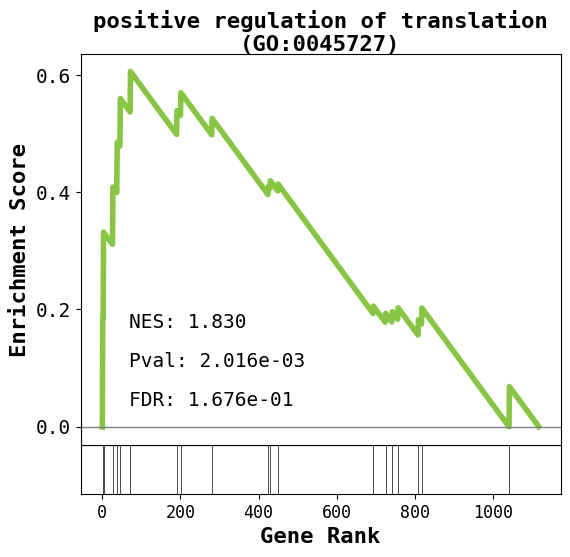

In [ ]:
# Para grafivar el primer proceso biologico
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "monospace"

term_to_plot = df_gene_out['Term'][0]

gseaplot(ranking=gsea_res.ranking, **{**gsea_res.results[term_to_plot], 'term': term_to_plot})

plt.savefig('my_gsea_plot.png',dpi=300,facecolor='white',bbox_inches='tight')



## Plot the figures for top 10 terms

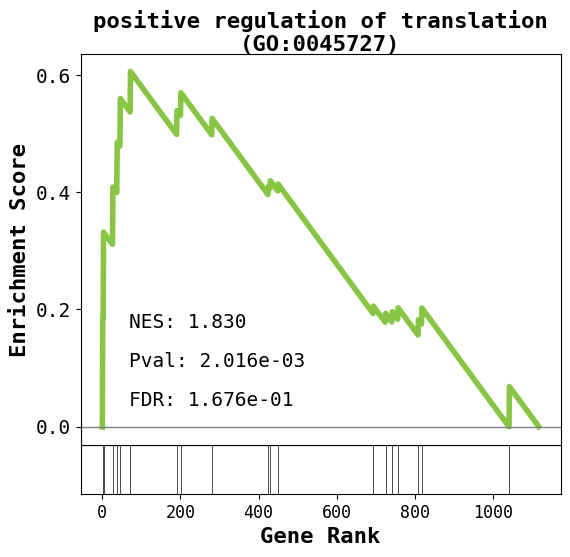

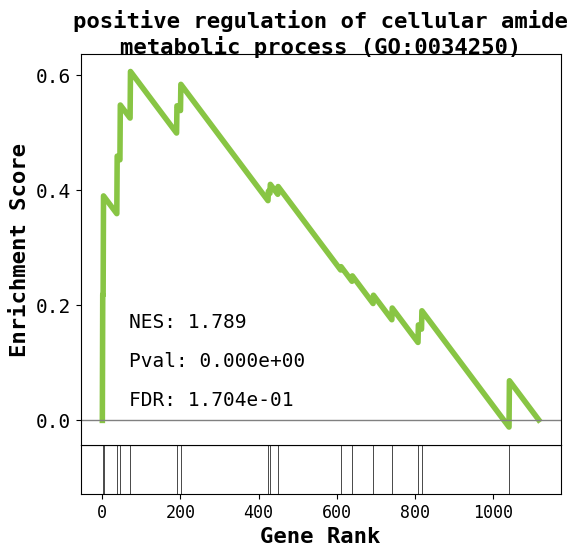

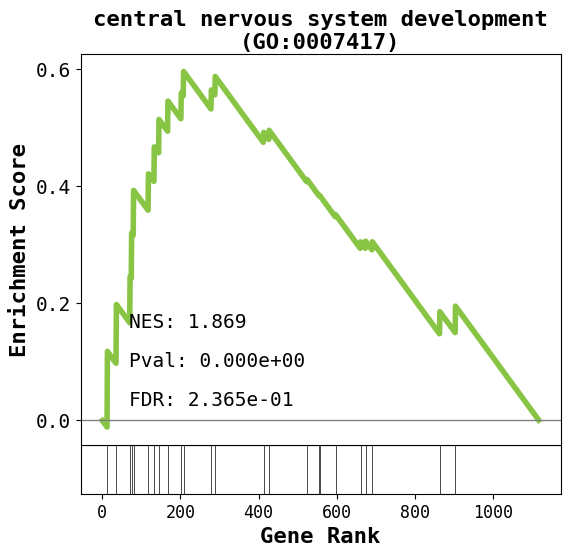

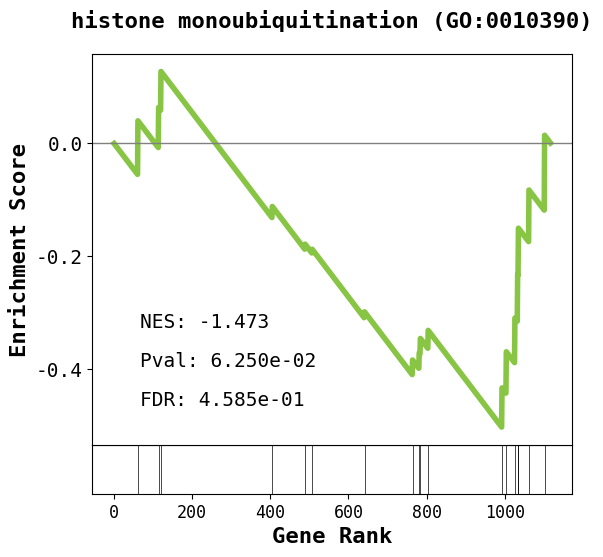

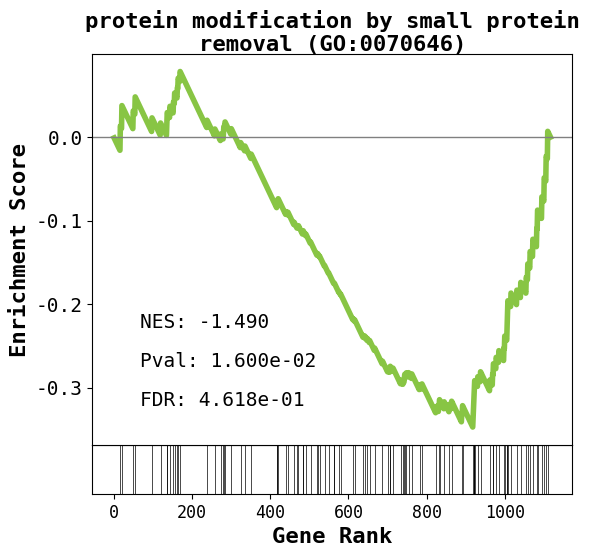

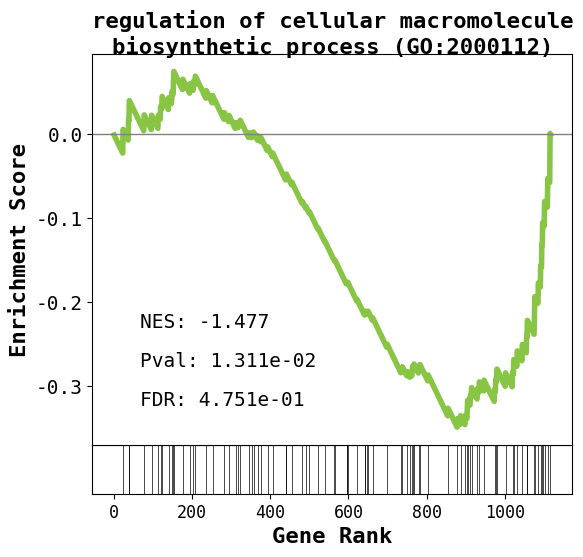

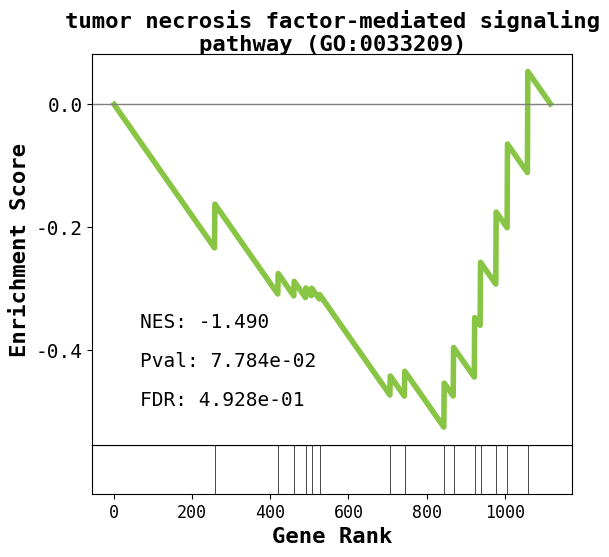

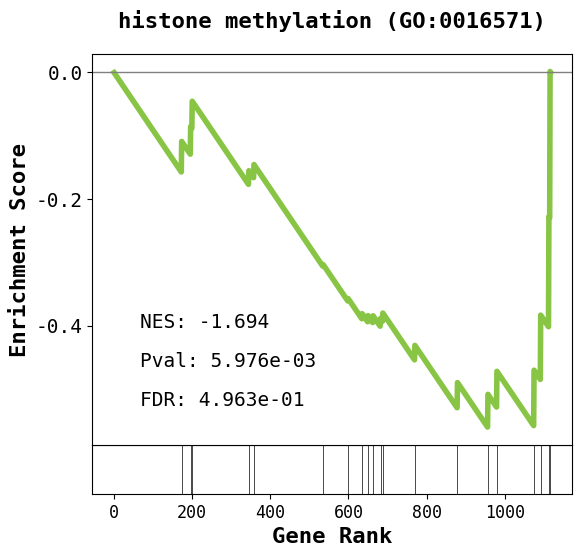

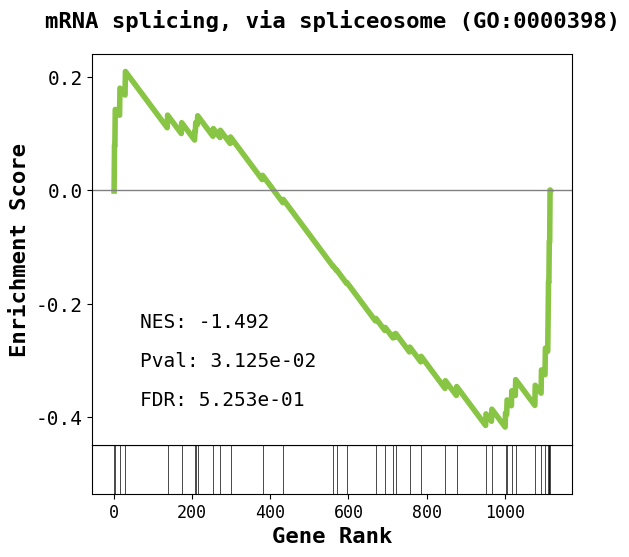

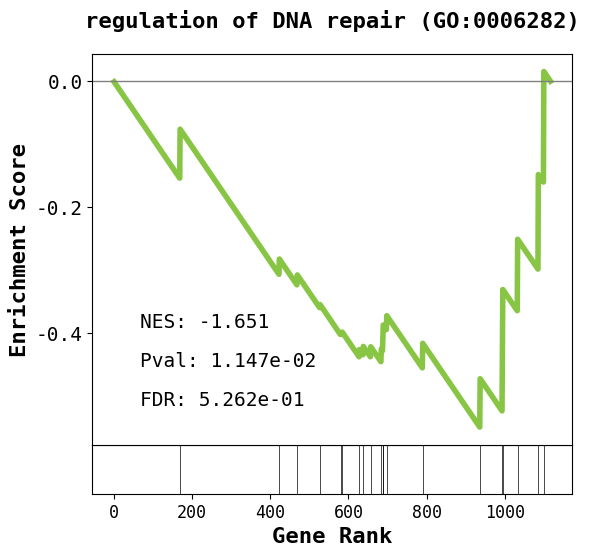

In [ ]:
## Plot the GSEA figure for specific term
for term in df_gene_out['Term'][0:10]:
    params = {**gsea_res.results[term], 'ranking': gsea_res.ranking, 'term': term}
    gseaplot(**params)
    filename = f"gsea_plot_{term.replace(' ', '_').replace('/', '-')}.png"
    plt.savefig(filename,dpi=300,facecolor='white',bbox_inches='tight')


## Plot the GSEA figure for specific term

In [ ]:
# from gseapy.plot import gseaplot
# import matplotlib.pyplot as plt



for term in df_gene_out['Term'][0:10]:
    plt.rcParams["font.size"] = 4
    plt.rcParams["font.family"] = "monospace"
    gseaplot(gsea_res.ranking, **gsea_res.results[term])
    filename = f"gsea_plot_{term.replace(' ', '_').replace('/', '-')}.png"
    plt.savefig(filename,dpi=300,facecolor='white',bbox_inches='tight')

## Mulyipathway in one figure

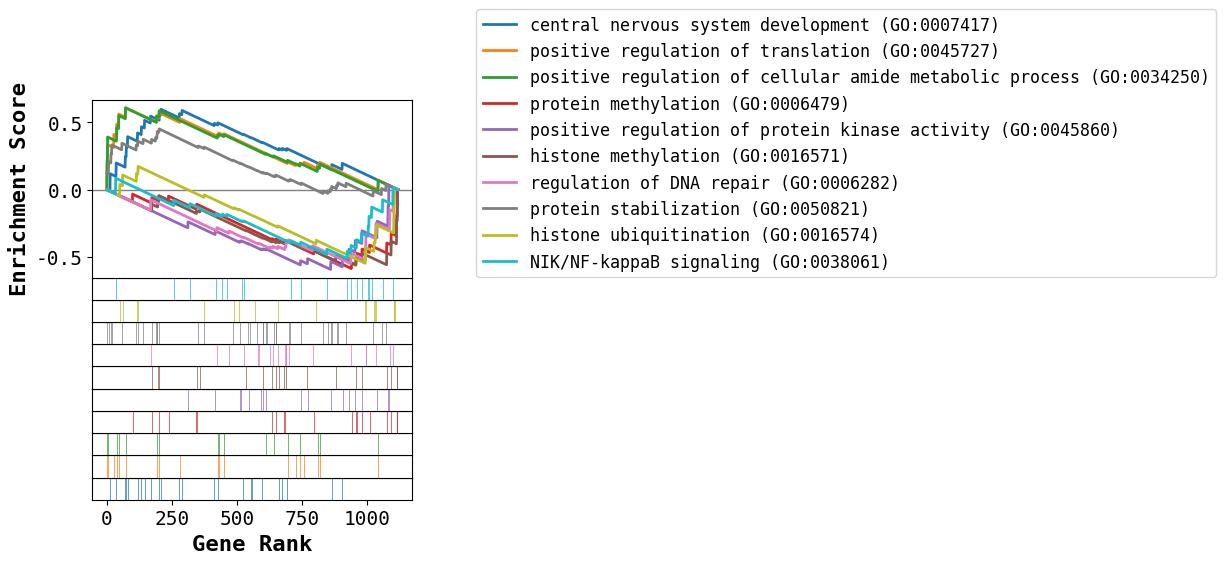

In [ ]:
# from gseapy import gseaplot2
# terms = df_gene_out.Term[0:10]
terms = gsea_res.res2d.Term[0:10]
hits = [gsea_res.results[t]['hits'] for t in terms]
runes = [gsea_res.results[t]['RES'] for t in terms]
fig = gseaplot2(terms=terms, RESs=runes, hits=hits,
#              rank_metric=gsea_res.ranking,
               legend_kws={'loc': (1.2, 0)}, # set the legend loc
               figsize=(4,5)) # rank_metric=pre_res.ranking